In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import integrate
import sympy
import mpmath
import skmonaco

%matplotlib inline
sympy.init_printing();

### Numerical Integration Methods (p269)

In [2]:
a, b, X = sympy.symbols("a, b, x")
f = sympy.Function("f")

In [3]:
# the endpoints
# and the middle point of the inverval [a, b]
x = a, (a+b)/2, b

# weights factors to be used in the quadrature rule
w = [sympy.symbols("w_%d" % i) for i in range(len(x))]

In [4]:
# construct a symbolic expressin for the
# quadrature rule
q_rule = sum([w[i] * f(x[i]) for i in range(len(x))])
q_rule

In [5]:
# create symbolic representations for each of these
# basis functions
phi = [sympy.Lambda(X, X**n) for n in range(len(x))]
phi

In [6]:
# obtain an equation system for the unknown weight factors
eqs = [
    q_rule.subs(f, phi[n]) - sympy.integrate(phi[n](X), (X, a, b))
    for n in range(len(phi))
]
eqs

In [7]:
# we get analytical expressions for the weight factors
w_sol = sympy.solve(eqs, w)
w_sol

In [8]:
# plug above solution to the symbolic expression
# for the quadrature rule
q_rule.subs(w_sol).simplify()

### Numerical Integration with ScipPy (p274)

In [9]:
# define a function for the integrand
def f(x):
    return np.exp(-x**2)

In [10]:
val, err = integrate.quad(f, -1, 1)
val, err

In [11]:
# define a function for the integrand that takes all additional arguments 
def f(x, a, b, c):
    return a * np.exp(-((x - b)/c)**2)

In [12]:
val, err = integrate.quad(f, -1, 1, args=(1, 2, 3))
val, err

In [13]:
# quad routine supports infinite integration limits
f = lambda x: np.exp(-x**2)
val, err = integrate.quad(f, -np.inf, np.inf)
val, err

In [14]:
# quadrature and fixed_quad functions only support finite integration limits
# the following fails because of the diverging integrand
f = lambda x: 1/np.sqrt(abs(x))
a, b = -1, 1
integrate.quad(f, a, b)

/Users/geeyeol/.pyenv/versions/3.6.1/envs/higee/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


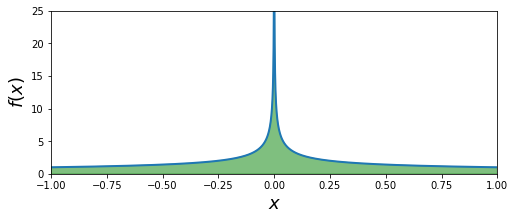

In [15]:
fig, ax = plt.subplots(figsize=(8, 3))
x = np.linspace(a, b, 10000)
ax.plot(x, f(x), lw=2)
ax.fill_between(x, f(x), color='green', alpha=0.5)
ax.set_xlabel("$x$", fontsize=18)
ax.set_ylabel("$f(x)$", fontsize=18)
ax.set_ylim(0, 25)
ax.set_xlim(-1, 1);

In [16]:
# specify a list of points that should be avoided
integrate.quad(f, a, b, points=[0])

#### Tabulated Integrand (p277)

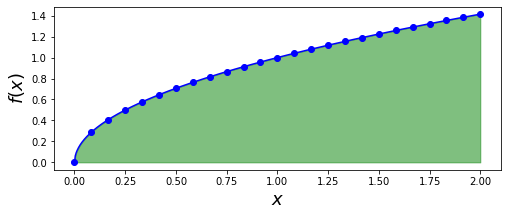

In [17]:
# take 25 ssamples of the integrand in the integration interval [0, 2]
f = lambda x: np.sqrt(x)
a, b = 0, 2
x = np.linspace(a, b, 25)
y = f(x)
fig, ax = plt.subplots(figsize=(8, 3))
ax.plot(x, y, 'bo')
xx = np.linspace(a, b, 500)
ax.plot(xx, f(xx), 'b-')
ax.fill_between(xx, f(xx), color='green', alpha=0.5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x)$", fontsize=18);

In [18]:
# evaluate the integral
val_trapz = integrate.trapz(y, x)
val_simps = integrate.simps(y, x)
val_trapz, val_simps

In [19]:
# compute the integral analytically and compare to the numerical values
val_exact = 2.0/3.0 * (b-a)**(3.0/2.0)
val_exact, val_exact - val_trapz, val_exact - val_simps

In [20]:
# Romberg method is a Newton-Cotes method but one that
# uses Richardson extrapolation to accelerate the convergence
# of the trapezoid method
# but requires evenly spaced sample points
x = np.linspace(a, b, 1 + 2**6)
y = f(x)
dx = x[1] - x[0]
val_exact - integrate.romb(y, dx=dx)

### Multiple Integration (p280)

In [21]:
# define the function for the integrand
def f(x, y):
    return np.exp(-x**2 - y**2)

/Users/geeyeol/.pyenv/versions/3.6.1/envs/higee/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: The following kwargs were not used by contour: 'vamx'
  """


Text(0, 0.5, '$y$')

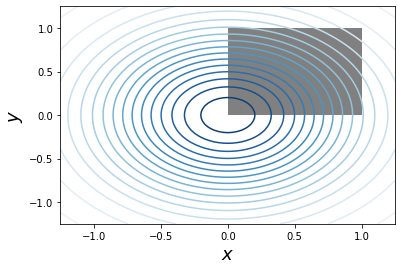

In [22]:
# graph the function and the integration region
fig, ax = plt.subplots(figsize=(6, 4))
x = y = np.linspace(-1.25, 1.25, 75)
X, Y = np.meshgrid(x, y)
c = ax.contour(X, Y, f(X, Y), 15, cmap=mpl.cm.RdBu, vmin=-1, vamx=1)
bound_rect = plt.Rectangle((0, 0), 1, 1, facecolor="grey")
ax.add_patch(bound_rect)
ax.axis('tight')
ax.set_xlabel("$x$", fontsize=18)
ax.set_ylabel("$y$", fontsize=18)

In [23]:
# need to define the functions because dblquad expects
# functions for the integration limits for the y variable
a, b = 0, 1
g = lambda x: 0
h = lambda x: 1

In [24]:
# evaluate the integral
integrate.dblquad(f, a, b, g, h)

In [25]:
# less readable, more concise using lambda
integrate.dblquad(
    lambda x, y : np.exp(-x**2-y**2), 
    0, 
    1, 
    lambda x: 0, 
    lambda x: 1
)

In [26]:
# compute integrals with x-dependent integration limits 
# along the y dimension given that g and h are functions
integrate.dblquad(f, 0, 1, lambda x: -1 + x, lambda x: 1- x)

In [27]:
# first define functions for the integrand and the integration limits
# and the call to the tplquad function
def f(x, y, z):
    return np.exp(-x**2-y**2-z**2)

a, b = 0, 1
g, h = lambda x: 0, lambda x: 1
q, r = lambda x, y: 0, lambda x, y :1
integrate.tplquad(f, 0, 1, g, h ,q, r)

In [28]:
# compute the integral using nquad
integrate.nquad(f, [(0, 1), (0, 1), (0, 1)])

In [29]:
# as the number of integration variables grow, so does the complexity
def f(*args):
    """
    f(x1, x2, ..., xn) = exp(-x1^2 - x2^2 - ... - xn^2)
    """
    return np.exp(-np.sum(np.array(args)**2))

In [30]:
# evaluate the integral for varying number of dimensions
for i in range(1, 6):
    %time integrate.nquad(f, [(0, 1)] * i)

CPU times: user 346 µs, sys: 2 µs, total: 348 µs
Wall time: 352 µs
CPU times: user 4.43 ms, sys: 16 µs, total: 4.45 ms
Wall time: 4.46 ms
CPU times: user 95.9 ms, sys: 1.65 ms, total: 97.5 ms
Wall time: 97 ms
CPU times: user 2.03 s, sys: 14.2 ms, total: 2.05 s
Wall time: 2.06 s
CPU times: user 42.7 s, sys: 283 ms, total: 42.9 s
Wall time: 43.1 s


In [31]:
# Monte Carlo integration scales well with dimensionality
# and is a competitive method for high-dimensional integrals
%time val, err = skmonaco.mcquad(f, xl=np.zeros(5), xu=np.ones(5), npoints=100000)
val, err

CPU times: user 1.15 s, sys: 41.3 ms, total: 1.19 s
Wall time: 1.17 s


### Symbolic and Arbitrary-Precision Integration (p285)

In [32]:
# compute definite/indefinite integrals of symbolic functions
x = sympy.symbols("x")
f = 2 * sympy.sqrt(1-x**2)
a, b = -1, 1

# compute the closed-form expression for the integral
val_sym = sympy.integrate(f, (x, a, b))
val_sym

In [33]:
# set accurate decimal places
mpmath.mp.dps = 75

# pass a function as an integrand
f_mpmath = sympy.lambdify(x, f, 'mpmath')

# compute the integral
val = mpmath.quad(f_mpmath, (a, b))
sympy.sympify(val)

In [34]:
# compare te result
sympy.N(val_sym, mpmath.mp.dps+1) - val

In [35]:
# create SymPy expressions for the integrands
x, y, z = sympy.symbols("x, y, z")
f2 = sympy.cos(x) * sympy.cos(y) * sympy.exp(-x**2 - y**2)
f3 = sympy.cos(x) * sympy.cos(y) * sympy.cos(z) * sympy.exp(-x**2 - y**2 - z**2)

# create the corresponding mpmath expressions
f2_mpmath = sympy.lambdify((x, y), f2, 'mpmath')
f3_mpmath = sympy.lambdify((x, y, z), f3, 'mpmath')

# evaluate the integrals to the desired accuracy
mpmath.mp.dps = 30
mpmath.quad(f2_mpmath, (0, 1), (0, 1))
res = mpmath.quad(f3_mpmath, (0, 1), (0, 1), (0, 1))
sympy.sympify(res)

#### Line Integrals (p288)

In [36]:
# create a curve instance
t, x, y = sympy.symbols("t, x, y")
C = sympy.Curve([sympy.cos(t), sympy.sin(t)], (t, 0, 2 * sympy.pi))
C

# compute the corresponding line integral for a given integrand
sympy.line_integrate(1, C, [x, y])

# non-trivial integrand
sympy.line_integrate(x**2 * y**2, C, [x, y])

### Integral Transforms (p289)

In [37]:
s = sympy.symbols("s")
a, t = sympy.symbols("a, t", positive=True)
f = sympy.sin(a*t)

# compute the Laplace transform
sympy.laplace_transform(f, t, s)

In [38]:
# suppres the conditions in the return
F = sympy.laplace_transform(f, t, s, noconds=True)
F

In [39]:
# compute the inverse Laplace transform and
# expect to recover the original function
sympy.inverse_laplace_transform(F, s, t, noconds=True)

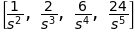

In [40]:
# examples of well-known functions in Laplace transformation tables
[sympy.laplace_transform(f, t, s, noconds=True) for f in [t, t**2, t**3, t**4]]

In [41]:
# general result with an arbitrary integer exponent
n = sympy.symbols("n", integer=True, positive=True)
sympy.laplace_transform(t**n, t, s, noconds=True)

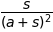

In [42]:
# compute the Laplace transform of composite expresions
sympy.laplace_transform((1 - a*t) * sympy.exp(-a*t), t, s, noconds=True)

In [43]:
# define SymPy symbols
a, t, w = sympy.symbols("a, t, omgega")
f = sympy.exp(-a*t**2)

# compute the Fourier transform
F = sympy.fourier_transform(f, t, w)
F

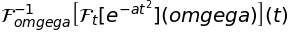

In [44]:
# compute the inverse transformation to recover the original function
sympy.inverse_fourier_transform(F, w, t)